# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Get the size of the sample train data

In [ ]:
x_train[0].shape

(28, 28)

Check the sample train data

In [ ]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [ ]:

y_train[333]

8

In [ ]:
#Check the actual image

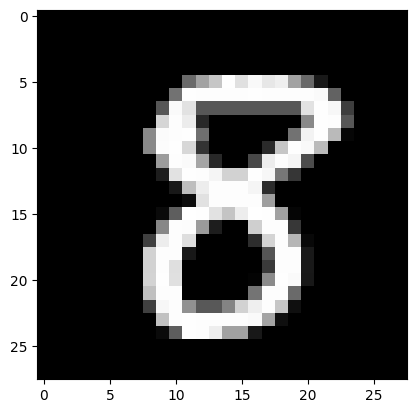

In [ ]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [ ]:

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [ ]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [ ]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [ ]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2557 - accuracy: 0.9221 - val_loss: 0.1114 - val_accuracy: 0.9634
Epoch 2/30
469/469 [==============================] - 8s 17ms/step - loss: 0.1048 - accuracy: 0.9682 - val_loss: 0.0913 - val_accuracy: 0.9698
Epoch 3/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0742 - accuracy: 0.9772 - val_loss: 0.0634 - val_accuracy: 0.9783
Epoch 4/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 5/30
469/469 [==============================] - 8s 18ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0584 - val_accuracy: 0.9822
Epoch 6/30
469/469 [==============================] - 8s 17ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0591 - val_accuracy: 0.9813
Epoch 7/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0665 - val_accuracy: 0.9822

Use Keras evaluate function to evaluate performance on the test set

In [ ]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08793707937002182
Test accuracy: 0.9861999750137329


Interpret the result

#type your answer here

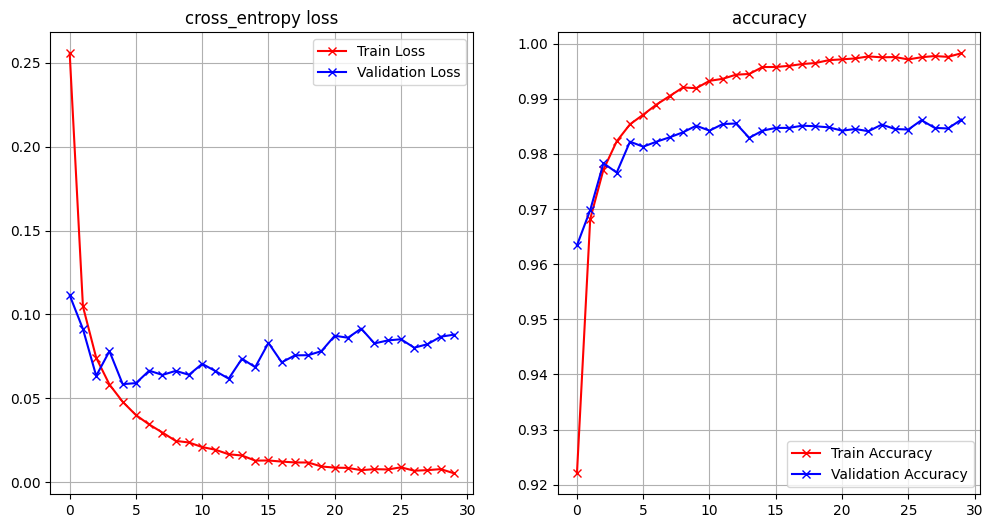

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

Interpret the result

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

In [ ]:
full_model = []
full_hist = []
full_score = []
y_class = []
y_pred = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

    plt.suptitle(f'{history} Loss and Accuracy')
    plt.savefig(f'drive/My Drive/CPE313/HOA 2.3/{history}.png')

##### model_1: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128)


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_1 = Sequential()

#Building the first hidden layer with size 400
model_1.add(Dense(400, activation = 'relu', input_shape = (784, )))

#Regulating the first layer at 0.4
model_1.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_1.add(Dense(300, activation = 'relu', input_shape = (784, )))

#Regulating the first layer at 0.4
model_1.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_1.add(Dense(10, activation = 'softmax'))

In [ ]:
#Displaying the details of the model_1
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               120300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###### How many parameters does your model have? How does it compare with the previous model?

Model_1 has 437310 parameters while model has has 669706 using the MNIST dataset. The model_1 specifically has lesser parameter than model because of the number of neurons given to each layers. For model, it has 512 neurons each layer resulting to

    model's total params =  (512 [Layer 1 neurons] * 784 [input_shape] + 512 [Bias])
    
    + (512 [Layer 2 neurons] * 512 [input_shape] + 512 [Bias])
    
    + (10 [output neurons] * 512 [input_shape] + 10 [bias])

while

    model_1's total params = (400 [Layer 1 neurons] * 784 [input_shape] + 400 [Bias])
    
    + (300 [Layer 2 neurons] * 400 [input_shape] + 300 [Bias])
    
    + (10 [output neurons] * 300 [input_shape] + 10 [bias])


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model)
full_model.append(model_1)

hist_1 = model_1.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(history)
full_hist.append(hist_1)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.3300 - accuracy: 0.9001 - val_loss: 0.1180 - val_accuracy: 0.9647
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1516 - accuracy: 0.9545 - val_loss: 0.0957 - val_accuracy: 0.9707
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1175 - accuracy: 0.9649 - val_loss: 0.0803 - val_accuracy: 0.9756
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0979 - accuracy: 0.9702 - val_loss: 0.0740 - val_accuracy: 0.9789
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0861 - accuracy: 0.9750 - val_loss: 0.0714 - val_accuracy: 0.9799
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0766 - accuracy: 0.9772 - val_loss: 0.0770 - val_accuracy: 0.9777
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0720 - accuracy: 0.9789 - val_loss: 0.0721 - val_accuracy: 0.9804

In [ ]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

full_score.append(score)
full_score.append(score_1)

Test loss: 0.07352037727832794
Test accuracy: 0.9843000173568726


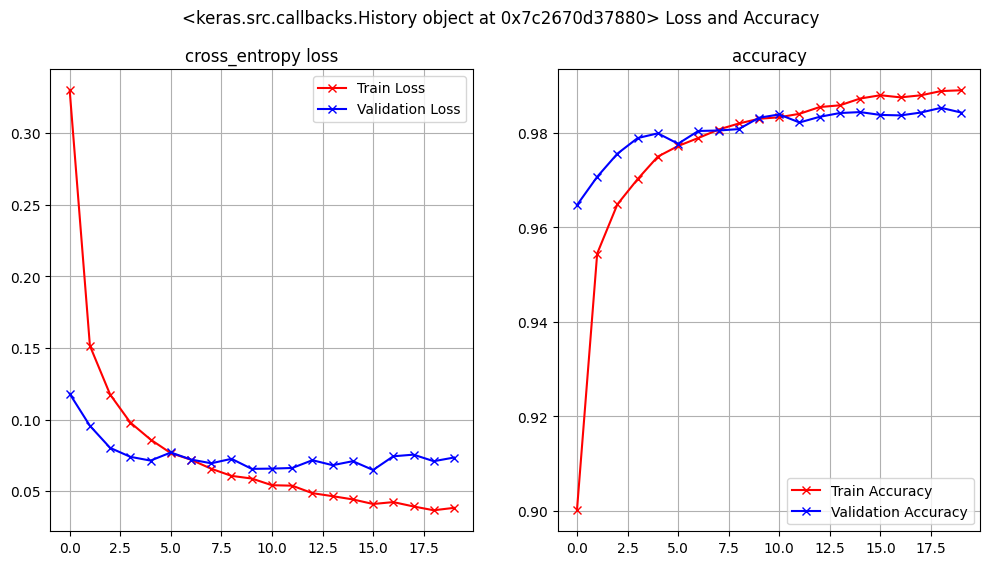

In [ ]:
plot_loss_accuracy(hist_1)

##### model_2: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.01))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_2 = Sequential()

#Building the first hidden layer with size 400
model_2.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.01)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_2.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.01)))

#Regulating the first layer at 0.4
model_2.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_2.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1(0.01)))

In [ ]:
#Displaying the details of the model_2
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dropout_4 (Dropout)         (None, 400)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               120300    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_2)

hist_2 = model_2.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_2)

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 11.6136 - accuracy: 0.1164 - val_loss: 4.4452 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 4.4456 - accuracy: 0.1124 - val_loss: 4.4451 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 4.4469 - accuracy: 0.1124 - val_loss: 4.4484 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 4.4477 - accuracy: 0.1124 - val_loss: 4.4463 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 4.4479 - accuracy: 0.1124 - val_loss: 4.4488 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 4.4481 - accuracy: 0.1124 - val_loss: 4.4468 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 4.4482 - accuracy: 0.1124 - val_loss: 4.4490 - val_accuracy: 0.11

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

full_score.append(score_2)

Test loss: 4.447136878967285
Test accuracy: 0.11349999904632568


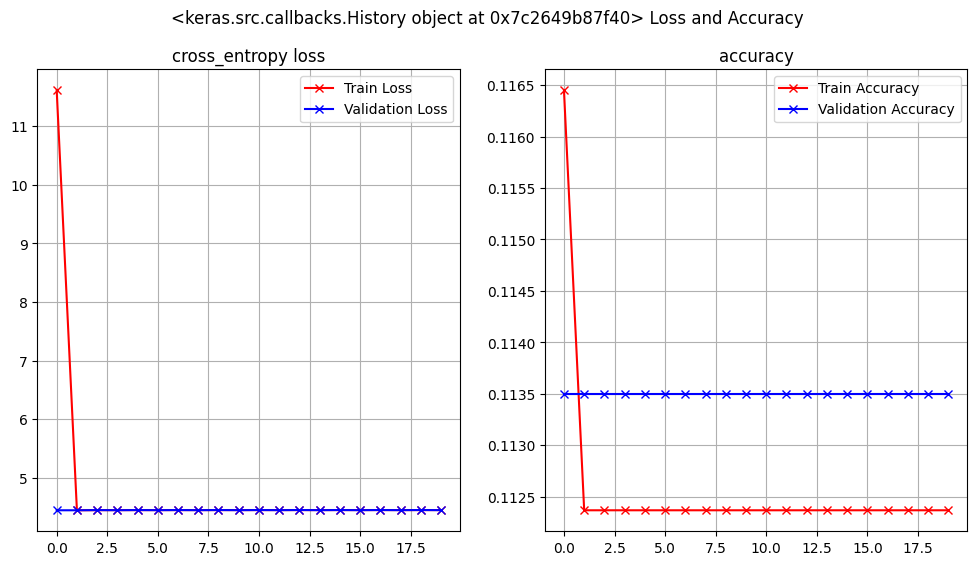

In [ ]:
plot_loss_accuracy(hist_2)

##### model_3: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.001))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_3 = Sequential()

#Building the first hidden layer with size 400
model_3.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_3.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_3.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.001)))

#Regulating the first layer at 0.4
model_3.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_3.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1(0.001)))

In [ ]:
#Displaying the details of the model_2
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 400)               314000    
                                                                 
 dropout_6 (Dropout)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               120300    
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_3.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_3)

hist_3 = model_3.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_3)

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 3.2266 - accuracy: 0.8127 - val_loss: 1.4540 - val_accuracy: 0.8714
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 1.4443 - accuracy: 0.8526 - val_loss: 1.2296 - val_accuracy: 0.9047
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 1.3297 - accuracy: 0.8644 - val_loss: 1.1574 - val_accuracy: 0.9134
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 1.2667 - accuracy: 0.8736 - val_loss: 1.0805 - val_accuracy: 0.9262
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 1.2357 - accuracy: 0.8751 - val_loss: 1.0698 - val_accuracy: 0.9215
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 1.2136 - accuracy: 0.8772 - val_loss: 1.0518 - val_accuracy: 0.9235
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 1.1954 - accuracy: 0.8802 - val_loss: 1.0138 - val_accuracy: 0.9331

In [ ]:
score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

full_score.append(score_3)

Test loss: 0.9431504011154175
Test accuracy: 0.9394000172615051


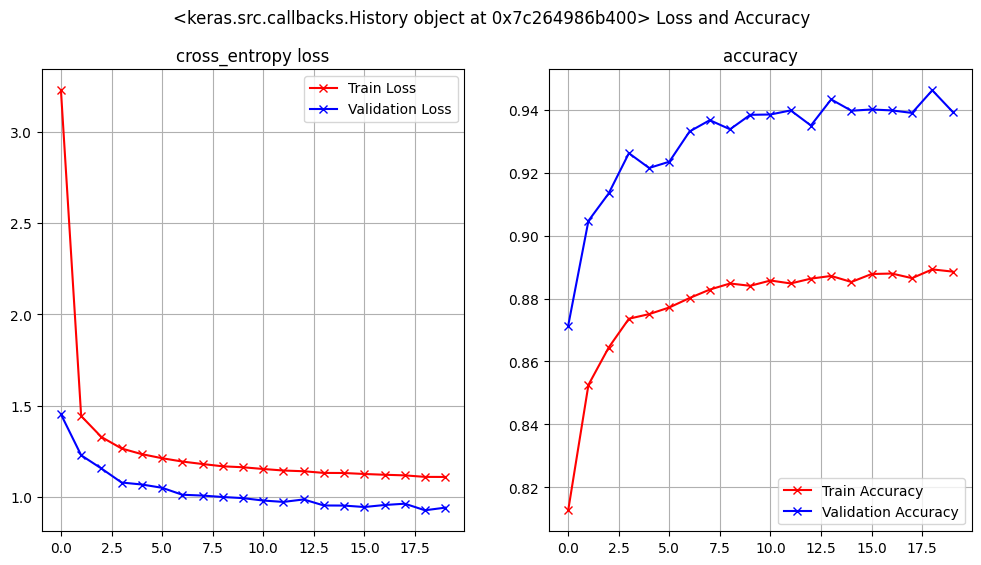

In [ ]:
plot_loss_accuracy(hist_3)

##### model_4: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.0001))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_4 = Sequential()

#Building the first hidden layer with size 400
model_4.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.0001)))

#Regulating the first layer at 0.4
model_4.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_4.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.0001)))

#Regulating the first layer at 0.4
model_4.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_4.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1(0.0001)))

In [ ]:
#Displaying the details of the model_2
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               120300    
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_4.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_4)

hist_4 = model_4.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_4)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 1.2631 - accuracy: 0.8936 - val_loss: 0.6981 - val_accuracy: 0.9546
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.6407 - accuracy: 0.9406 - val_loss: 0.5007 - val_accuracy: 0.9575
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5130 - accuracy: 0.9465 - val_loss: 0.4464 - val_accuracy: 0.9556
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.4572 - accuracy: 0.9503 - val_loss: 0.4056 - val_accuracy: 0.9580
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4272 - accuracy: 0.9529 - val_loss: 0.3536 - val_accuracy: 0.9723
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4084 - accuracy: 0.9545 - val_loss: 0.3382 - val_accuracy: 0.9744
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3959 - accuracy: 0.9561 - val_loss: 0.3314 - val_accuracy: 0.971

In [ ]:
score_4 = model_4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])

full_score.append(score_4)

Test loss: 0.2900368273258209
Test accuracy: 0.9753000140190125


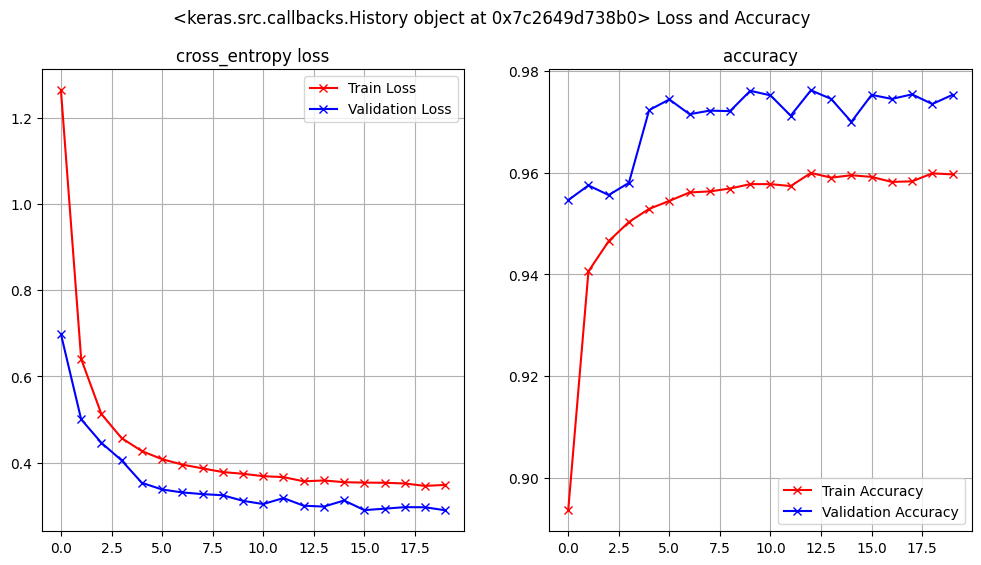

In [ ]:
plot_loss_accuracy(hist_4)

##### model_5: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.005))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_5 = Sequential()

#Building the first hidden layer with size 400
model_5.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.005)))

#Regulating the first layer at 0.4
model_5.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_5.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(0.005)))

#Regulating the first layer at 0.4
model_5.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_5.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1(0.005)))

In [ ]:
#Displaying the details of the model_2
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 400)               314000    
                                                                 
 dropout_10 (Dropout)        (None, 400)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               120300    
                                                                 
 dropout_11 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_5.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_5)

hist_5 = model_5.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_5)

Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 7.1125 - accuracy: 0.4913 - val_loss: 2.9483 - val_accuracy: 0.6991
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 3.0956 - accuracy: 0.5709 - val_loss: 2.7835 - val_accuracy: 0.7631
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 3.0265 - accuracy: 0.6005 - val_loss: 2.7147 - val_accuracy: 0.8125
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 2.9837 - accuracy: 0.6142 - val_loss: 2.6509 - val_accuracy: 0.8162
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 2.9610 - accuracy: 0.6180 - val_loss: 2.6232 - val_accuracy: 0.8252
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 2.9489 - accuracy: 0.6268 - val_loss: 2.6202 - val_accuracy: 0.8316
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 2.9355 - accuracy: 0.6299 - val_loss: 2.6081 - val_accuracy: 0.8318

In [ ]:
score_5 = model_5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_5[0])
print('Test accuracy:', score_5[1])

full_score.append(score_5)

Test loss: 2.5560762882232666
Test accuracy: 0.8446999788284302


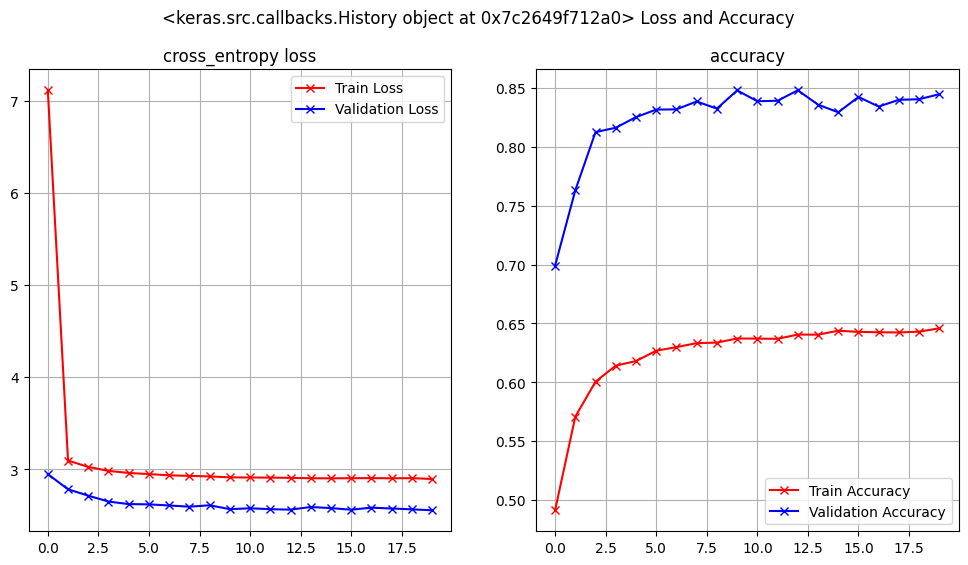

In [ ]:
plot_loss_accuracy(hist_5)

##### model_6: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l2 x2 (0.01))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_6 = Sequential()

#Building the first hidden layer with size 400
model_6.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.01)))

#Regulating the first layer at 0.4
model_6.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_6.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.01)))

#Regulating the first layer at 0.4
model_6.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_6.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.01)))

In [ ]:
#Displaying the details of the model_2
model_6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 400)               314000    
                                                                 
 dropout_12 (Dropout)        (None, 400)               0         
                                                                 
 dense_19 (Dense)            (None, 300)               120300    
                                                                 
 dropout_13 (Dropout)        (None, 300)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_6.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_6)

hist_6 = model_6.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_6)

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 1.7423 - accuracy: 0.8454 - val_loss: 0.8745 - val_accuracy: 0.8966
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.9242 - accuracy: 0.8742 - val_loss: 0.8202 - val_accuracy: 0.9102
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.9057 - accuracy: 0.8771 - val_loss: 0.7994 - val_accuracy: 0.9125
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.8965 - accuracy: 0.8790 - val_loss: 0.8218 - val_accuracy: 0.9040
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.8939 - accuracy: 0.8799 - val_loss: 0.8401 - val_accuracy: 0.8980
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.8898 - accuracy: 0.8799 - val_loss: 0.8239 - val_accuracy: 0.9024
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.8864 - accuracy: 0.8810 - val_loss: 0.8234 - val_accuracy: 0.9004

In [ ]:
score_6 = model_6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_6[0])
print('Test accuracy:', score_6[1])

full_score.append(score_6)

Test loss: 0.7931398153305054
Test accuracy: 0.9077000021934509


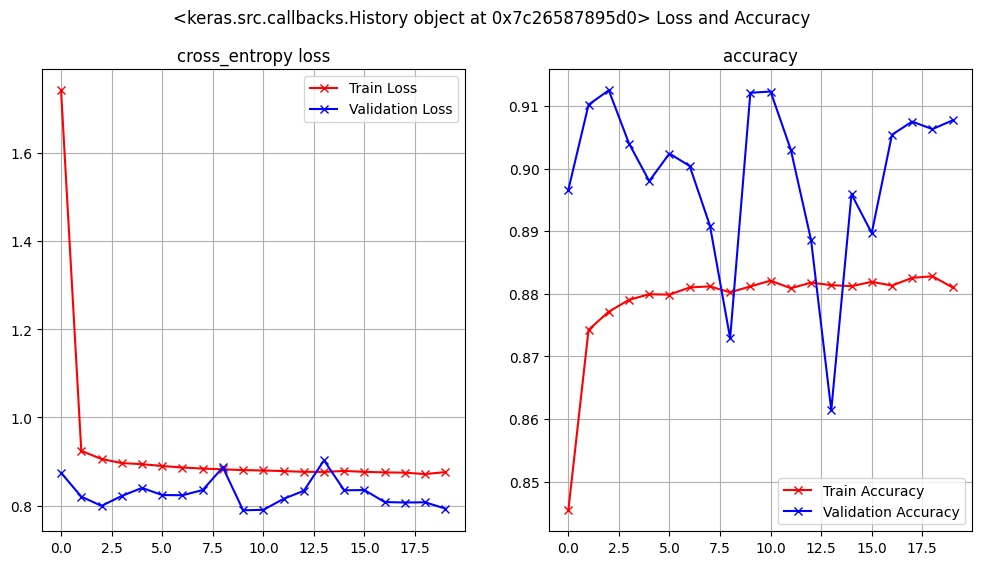

In [ ]:
plot_loss_accuracy(hist_6)

##### model_7: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l2 x2 (0.001))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_7 = Sequential()

#Building the first hidden layer with size 400
model_7.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.001)))

#Regulating the first layer at 0.4
model_7.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_7.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.001)))

#Regulating the first layer at 0.4
model_7.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_7.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.001)))

In [ ]:
#Displaying the details of the model_2
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 400)               314000    
                                                                 
 dropout_14 (Dropout)        (None, 400)               0         
                                                                 
 dense_22 (Dense)            (None, 300)               120300    
                                                                 
 dropout_15 (Dropout)        (None, 300)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_7.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_7)

hist_7 = model_7.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_7)

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 0.8157 - accuracy: 0.8938 - val_loss: 0.4218 - val_accuracy: 0.9552
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4069 - accuracy: 0.9447 - val_loss: 0.3087 - val_accuracy: 0.9638
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3419 - accuracy: 0.9503 - val_loss: 0.2827 - val_accuracy: 0.9638
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3165 - accuracy: 0.9545 - val_loss: 0.2795 - val_accuracy: 0.9650
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3104 - accuracy: 0.9549 - val_loss: 0.2603 - val_accuracy: 0.9695
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3060 - accuracy: 0.9558 - val_loss: 0.2596 - val_accuracy: 0.9698
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.3009 - accuracy: 0.9570 - val_loss: 0.2772 - val_accuracy: 0.9612

In [ ]:
score_7 = model_7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_7[0])
print('Test accuracy:', score_7[1])

full_score.append(score_7)

Test loss: 0.2655916213989258
Test accuracy: 0.9643999934196472


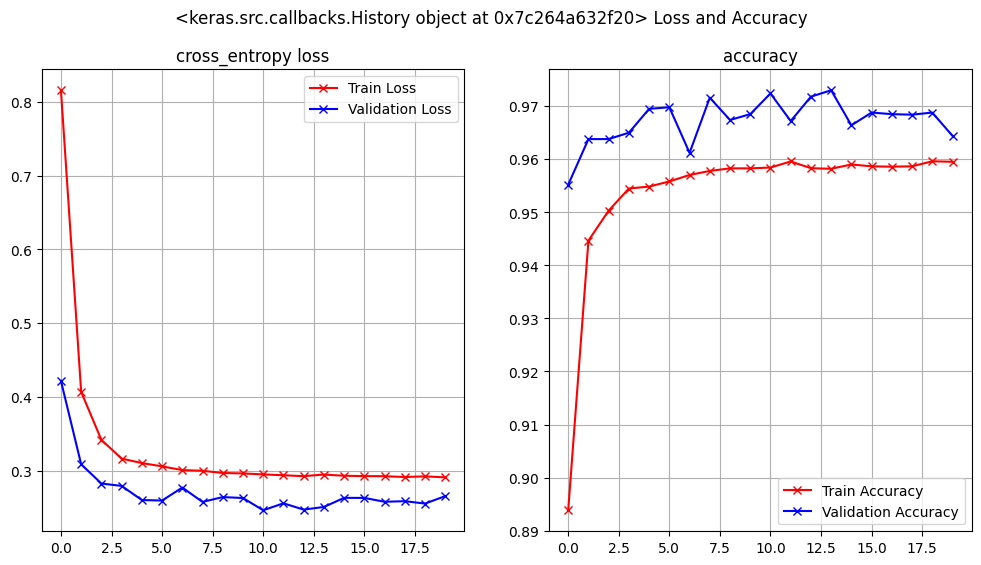

In [ ]:
plot_loss_accuracy(hist_7)

##### model_8: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.005))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_8 = Sequential()

#Building the first hidden layer with size 400
model_8.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.005)))

#Regulating the first layer at 0.4
model_8.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_8.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.005)))

#Regulating the first layer at 0.4
model_8.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_8.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.005)))

In [ ]:
#Displaying the details of the model_2
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 400)               314000    
                                                                 
 dropout_18 (Dropout)        (None, 400)               0         
                                                                 
 dense_28 (Dense)            (None, 300)               120300    
                                                                 
 dropout_19 (Dropout)        (None, 300)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_8.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

#full_model.append(model_8)
full_model[8] = model_8


hist_8 = model_8.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_8)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 1.3810 - accuracy: 0.8708 - val_loss: 0.6167 - val_accuracy: 0.9343
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6724 - accuracy: 0.9093 - val_loss: 0.5760 - val_accuracy: 0.9390
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6542 - accuracy: 0.9126 - val_loss: 0.5915 - val_accuracy: 0.9337
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.6464 - accuracy: 0.9149 - val_loss: 0.5774 - val_accuracy: 0.9342
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6411 - accuracy: 0.9166 - val_loss: 0.5640 - val_accuracy: 0.9408
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6359 - accuracy: 0.9166 - val_loss: 0.5593 - val_accuracy: 0.9386
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6359 - accuracy: 0.9158 - val_loss: 0.5611 - val_accuracy: 0.9399

In [ ]:
score_8 = model_8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_8[0])
print('Test accuracy:', score_8[1])

full_score.append(score_8)

Test loss: 0.9431504011154175
Test accuracy: 0.9394000172615051


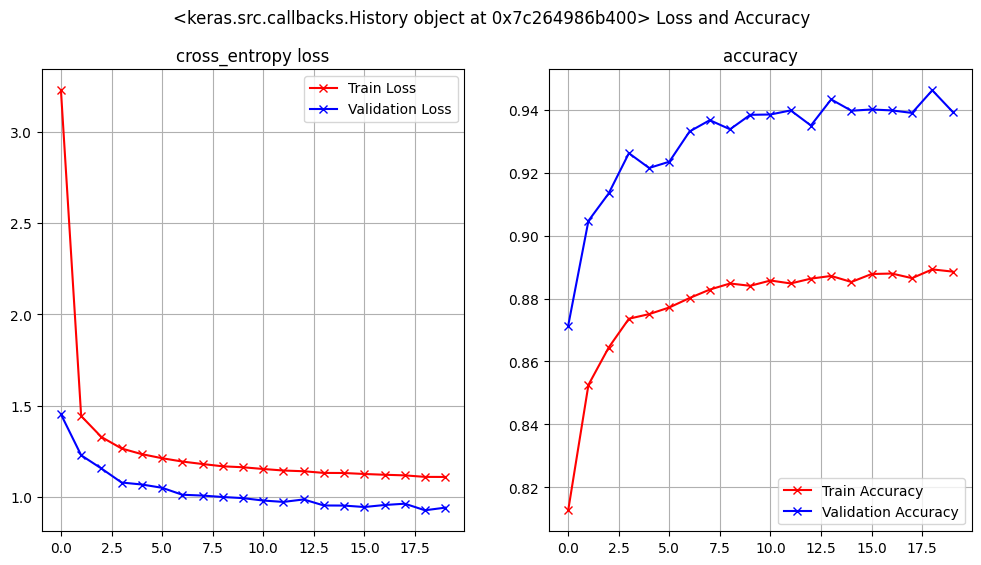

In [ ]:
plot_loss_accuracy(hist_8)

##### model_9: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.0005))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_9 = Sequential()

#Building the first hidden layer with size 400
model_9.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0005)))

#Regulating the first layer at 0.4
model_9.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_9.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0005)))

#Regulating the first layer at 0.4
model_9.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_9.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.0005)))

In [ ]:
#Displaying the details of the model_2
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 400)               314000    
                                                                 
 dropout_20 (Dropout)        (None, 400)               0         
                                                                 
 dense_31 (Dense)            (None, 300)               120300    
                                                                 
 dropout_21 (Dropout)        (None, 300)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_9.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_9)

hist_9 = model_9.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_9)

Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.6523 - accuracy: 0.8967 - val_loss: 0.3583 - val_accuracy: 0.9579
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.3516 - accuracy: 0.9492 - val_loss: 0.2867 - val_accuracy: 0.9586
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2847 - accuracy: 0.9564 - val_loss: 0.2248 - val_accuracy: 0.9697
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2565 - accuracy: 0.9604 - val_loss: 0.2133 - val_accuracy: 0.9703
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2415 - accuracy: 0.9630 - val_loss: 0.2062 - val_accuracy: 0.9728
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.2332 - accuracy: 0.9645 - val_loss: 0.2121 - val_accuracy: 0.9695
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.2287 - accuracy: 0.9654 - val_loss: 0.2010 - val_accuracy: 0.973

In [ ]:
score_9 = model_9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_9[0])
print('Test accuracy:', score_9[1])

full_score.append(score_9)

Test loss: 0.1854342222213745
Test accuracy: 0.9785000085830688


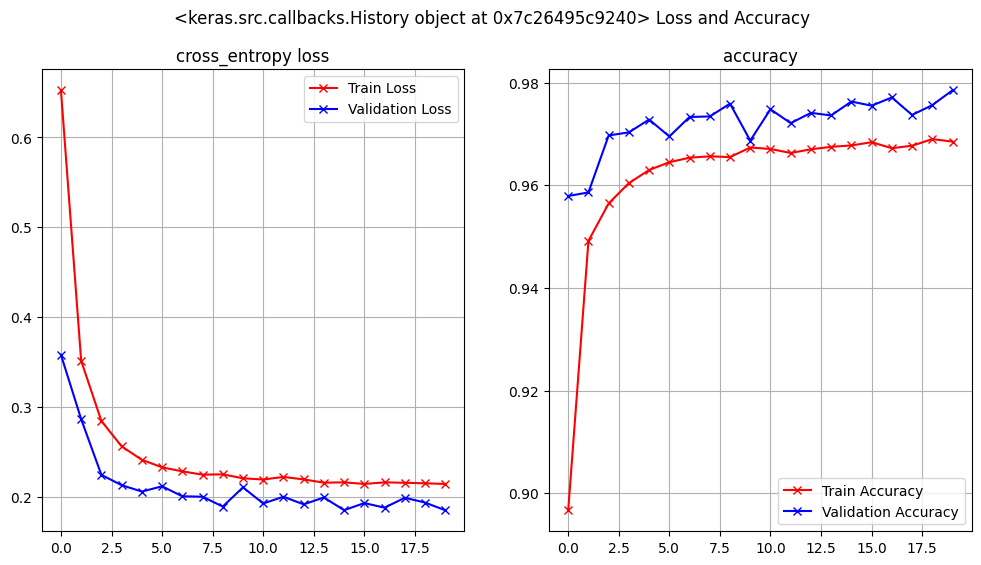

In [ ]:
plot_loss_accuracy(hist_9)

##### model_10: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.0001))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_10 = Sequential()

#Building the first hidden layer with size 400
model_10.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0001)))

#Regulating the first layer at 0.4
model_10.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_10.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0001)))

#Regulating the first layer at 0.4
model_10.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_10.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.0001)))

In [ ]:
#Displaying the details of the model_2
model_10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 400)               314000    
                                                                 
 dropout_22 (Dropout)        (None, 400)               0         
                                                                 
 dense_34 (Dense)            (None, 300)               120300    
                                                                 
 dropout_23 (Dropout)        (None, 300)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_10.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_10)

hist_10 = model_10.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_10)

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4245 - accuracy: 0.8970 - val_loss: 0.2230 - val_accuracy: 0.9564
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2370 - accuracy: 0.9525 - val_loss: 0.1703 - val_accuracy: 0.9710
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1973 - accuracy: 0.9627 - val_loss: 0.1563 - val_accuracy: 0.9755
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1760 - accuracy: 0.9676 - val_loss: 0.1434 - val_accuracy: 0.9771
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1626 - accuracy: 0.9704 - val_loss: 0.1375 - val_accuracy: 0.9786
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1492 - accuracy: 0.9728 - val_loss: 0.1321 - val_accuracy: 0.9781
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1447 - accuracy: 0.9736 - val_loss: 0.1267 - val_accuracy: 0.9792

In [ ]:
score_10 = model_10.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_10[0])
print('Test accuracy:', score_10[1])

full_score.append(score_10)

Test loss: 0.11013782024383545
Test accuracy: 0.9829000234603882


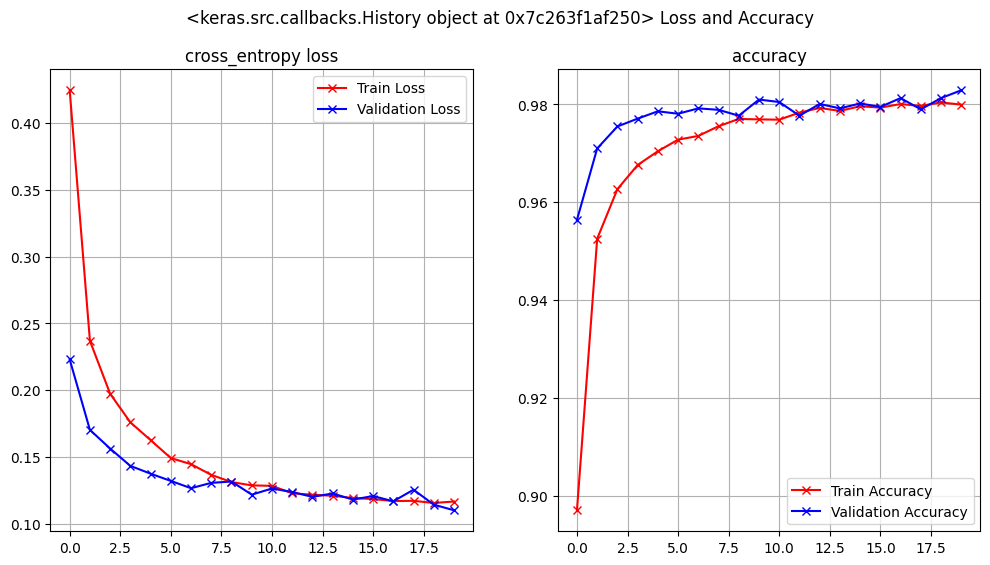

In [ ]:
plot_loss_accuracy(hist_10)

##### model_1: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1_l2 x2 (0.001))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_11 = Sequential()

#Building the first hidden layer with size 400
model_11.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1_l2(0.001)))

#Regulating the first layer at 0.4
model_11.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_11.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1_l2(0.001)))

#Regulating the first layer at 0.4
model_11.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_11.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1_l2(0.001)))

In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_11.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_11)

hist_11 = model_11.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_11)

Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 3.5316 - accuracy: 0.7669 - val_loss: 1.6983 - val_accuracy: 0.8634
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 1.7931 - accuracy: 0.7966 - val_loss: 1.5808 - val_accuracy: 0.8733
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 1.7291 - accuracy: 0.8010 - val_loss: 1.5529 - val_accuracy: 0.8744
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.7033 - accuracy: 0.8037 - val_loss: 1.5309 - val_accuracy: 0.8716
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 1.6882 - accuracy: 0.8038 - val_loss: 1.5126 - val_accuracy: 0.8751
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 1.6780 - accuracy: 0.8047 - val_loss: 1.4998 - val_accuracy: 0.8751
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 1.6718 - accuracy: 0.8052 - val_loss: 1.4890 - val_accuracy: 0.8794

In [ ]:
score_11 = model_11.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_11[0])
print('Test accuracy:', score_11[1])

full_score.append(score_11)

Test loss: 1.4870877265930176
Test accuracy: 0.8772000074386597


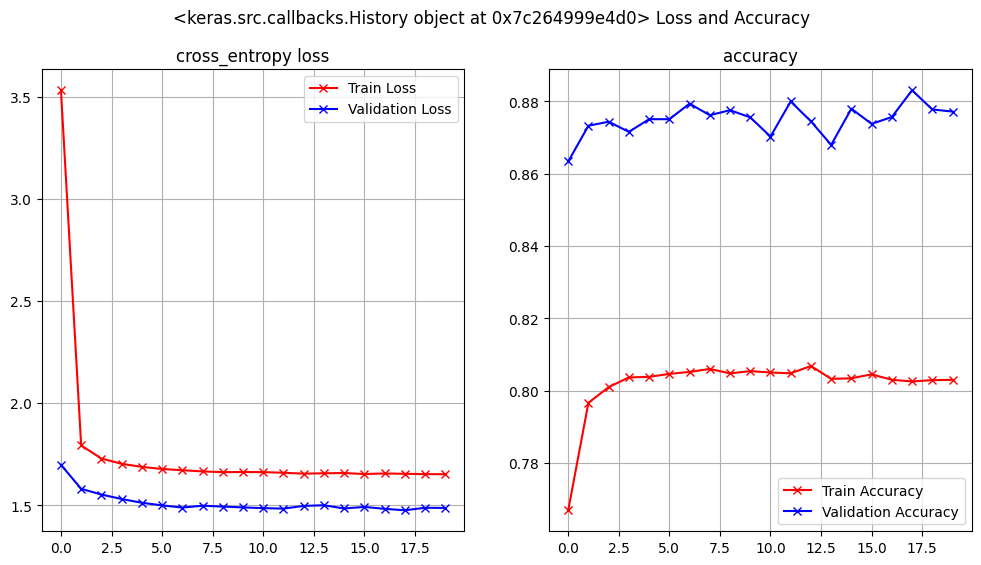

In [ ]:
plot_loss_accuracy(hist_11)

##### model_7: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l2 x2 (0.001))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_12 = Sequential()

#Building the first hidden layer with size 400
model_12.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1_l2(0.0001)))

#Regulating the first layer at 0.4
model_12.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_12.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1_l2(0.0001)))

#Regulating the first layer at 0.4
model_12.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_12.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l1_l2(0.0001)))

# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_12.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_12)

hist_12 = model_12.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_12)

Epoch 1/20
469/469 [==============================] - 63s 27ms/step - loss: 2.0257 - accuracy: 0.8364 - val_loss: 1.0165 - val_accuracy: 0.8922
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 1.0832 - accuracy: 0.8662 - val_loss: 0.9850 - val_accuracy: 0.8970
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0536 - accuracy: 0.8681 - val_loss: 0.9721 - val_accuracy: 0.9013
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0395 - accuracy: 0.8676 - val_loss: 0.9257 - val_accuracy: 0.9029
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0319 - accuracy: 0.8691 - val_loss: 0.9521 - val_accuracy: 0.9011
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0251 - accuracy: 0.8701 - val_loss: 0.9126 - val_accuracy: 0.9076
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0240 - accuracy: 0.8688 - val_loss: 0.9688 - val_accuracy: 0.889

In [ ]:
score_12 = model_12.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_12[0])
print('Test accuracy:', score_12[1])

full_score.append(score_12)

plot_loss_accuracy(hist_12)

Test loss: 0.2655916213989258
Test accuracy: 0.9643999934196472


##### model_8: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.005))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_8 = Sequential()

#Building the first hidden layer with size 400
model_8.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.005)))

#Regulating the first layer at 0.4
model_8.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_8.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.005)))

#Regulating the first layer at 0.4
model_8.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_8.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.005)))

In [ ]:
#Displaying the details of the model_2
model_8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 400)               314000    
                                                                 
 dropout_18 (Dropout)        (None, 400)               0         
                                                                 
 dense_28 (Dense)            (None, 300)               120300    
                                                                 
 dropout_19 (Dropout)        (None, 300)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_8.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

#full_model.append(model_8)
full_model[8] = model_8


hist_8 = model_8.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_8)

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 1.3810 - accuracy: 0.8708 - val_loss: 0.6167 - val_accuracy: 0.9343
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6724 - accuracy: 0.9093 - val_loss: 0.5760 - val_accuracy: 0.9390
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6542 - accuracy: 0.9126 - val_loss: 0.5915 - val_accuracy: 0.9337
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.6464 - accuracy: 0.9149 - val_loss: 0.5774 - val_accuracy: 0.9342
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6411 - accuracy: 0.9166 - val_loss: 0.5640 - val_accuracy: 0.9408
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6359 - accuracy: 0.9166 - val_loss: 0.5593 - val_accuracy: 0.9386
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6359 - accuracy: 0.9158 - val_loss: 0.5611 - val_accuracy: 0.9399

In [ ]:
score_8 = model_8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_8[0])
print('Test accuracy:', score_8[1])

full_score.append(score_8)

Test loss: 0.9431504011154175
Test accuracy: 0.9394000172615051


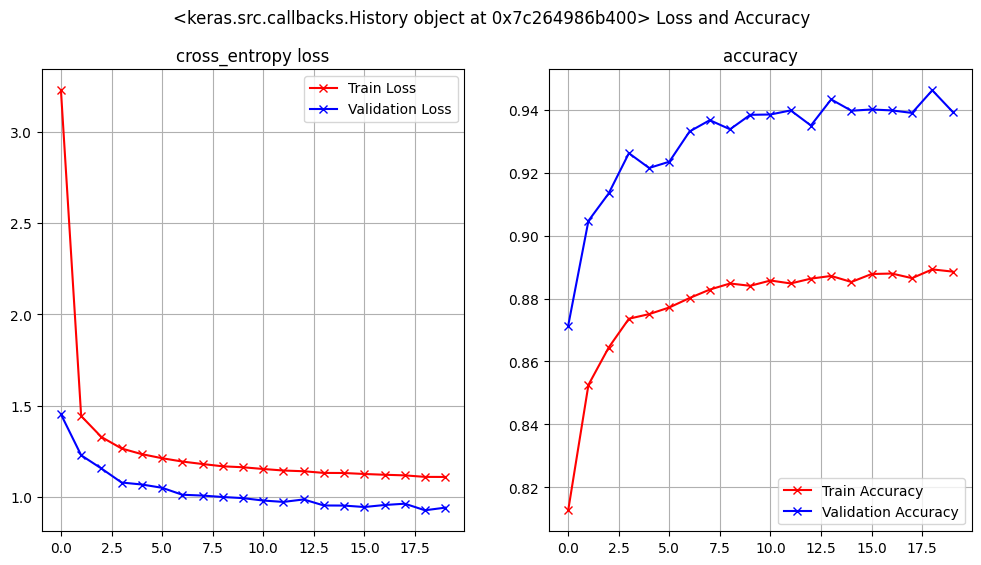

In [ ]:
plot_loss_accuracy(hist_8)

##### model_9: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.0005))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_9 = Sequential()

#Building the first hidden layer with size 400
model_9.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0005)))

#Regulating the first layer at 0.4
model_9.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_9.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0005)))

#Regulating the first layer at 0.4
model_9.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_9.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.0005)))

In [ ]:
#Displaying the details of the model_2
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 400)               314000    
                                                                 
 dropout_20 (Dropout)        (None, 400)               0         
                                                                 
 dense_31 (Dense)            (None, 300)               120300    
                                                                 
 dropout_21 (Dropout)        (None, 300)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_9.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_9)

hist_9 = model_9.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_9)

Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.6523 - accuracy: 0.8967 - val_loss: 0.3583 - val_accuracy: 0.9579
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.3516 - accuracy: 0.9492 - val_loss: 0.2867 - val_accuracy: 0.9586
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2847 - accuracy: 0.9564 - val_loss: 0.2248 - val_accuracy: 0.9697
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2565 - accuracy: 0.9604 - val_loss: 0.2133 - val_accuracy: 0.9703
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2415 - accuracy: 0.9630 - val_loss: 0.2062 - val_accuracy: 0.9728
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.2332 - accuracy: 0.9645 - val_loss: 0.2121 - val_accuracy: 0.9695
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.2287 - accuracy: 0.9654 - val_loss: 0.2010 - val_accuracy: 0.973

In [ ]:
score_9 = model_9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_9[0])
print('Test accuracy:', score_9[1])

full_score.append(score_9)

Test loss: 0.1854342222213745
Test accuracy: 0.9785000085830688


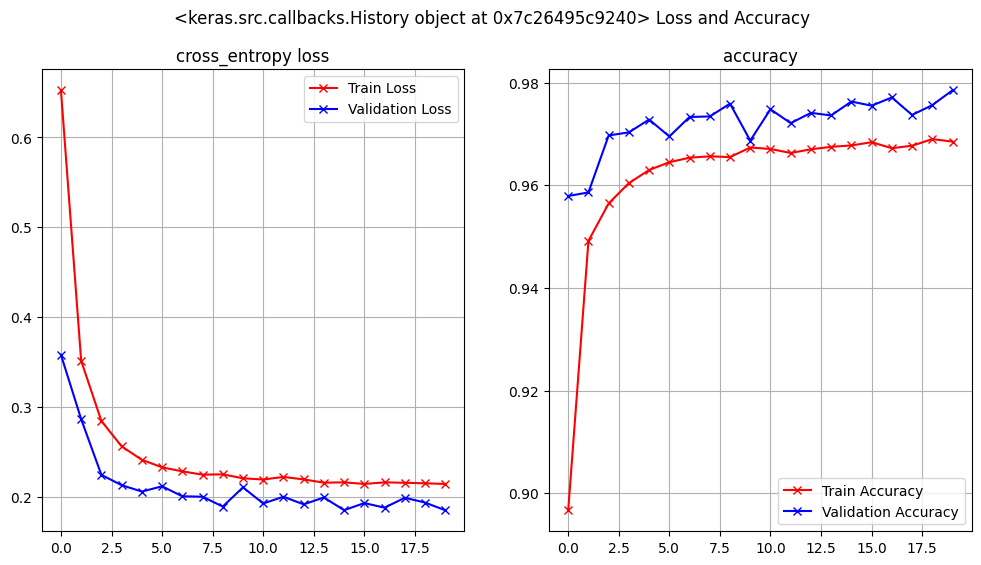

In [ ]:
plot_loss_accuracy(hist_9)

##### model_10: (RMSProp, Epochs = 20, learning_rate = 0.001, batch_size = 128, regularization = l1 x2 (0.0001))


In [ ]:
# Building two layers with size 400 on first and 300 on the second then regulating at .4.

model_10 = Sequential()

#Building the first hidden layer with size 400
model_10.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0001)))

#Regulating the first layer at 0.4
model_10.add(Dropout(0.4))

#Building the second hidden layer with size 300
model_10.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l2(0.0001)))

#Regulating the first layer at 0.4
model_10.add(Dropout(0.4))

#Building the output layer with size 10, taking the values of y
model_10.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(0.0001)))

In [ ]:
#Displaying the details of the model_2
model_10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 400)               314000    
                                                                 
 dropout_22 (Dropout)        (None, 400)               0         
                                                                 
 dense_34 (Dense)            (None, 300)               120300    
                                                                 
 dropout_23 (Dropout)        (None, 300)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437310 (1.67 MB)
Trainable params: 437310 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

model_10.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(lr = 0.001),
    metrics = ['accuracy']
)

full_model.append(model_10)

hist_10 = model_10.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 1,
    validation_data = (x_test, y_test)
)

full_hist.append(hist_10)

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4245 - accuracy: 0.8970 - val_loss: 0.2230 - val_accuracy: 0.9564
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2370 - accuracy: 0.9525 - val_loss: 0.1703 - val_accuracy: 0.9710
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1973 - accuracy: 0.9627 - val_loss: 0.1563 - val_accuracy: 0.9755
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1760 - accuracy: 0.9676 - val_loss: 0.1434 - val_accuracy: 0.9771
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1626 - accuracy: 0.9704 - val_loss: 0.1375 - val_accuracy: 0.9786
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1492 - accuracy: 0.9728 - val_loss: 0.1321 - val_accuracy: 0.9781
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1447 - accuracy: 0.9736 - val_loss: 0.1267 - val_accuracy: 0.9792

In [ ]:
score_10 = model_10.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_10[0])
print('Test accuracy:', score_10[1])

full_score.append(score_10)

Test loss: 0.11013782024383545
Test accuracy: 0.9829000234603882


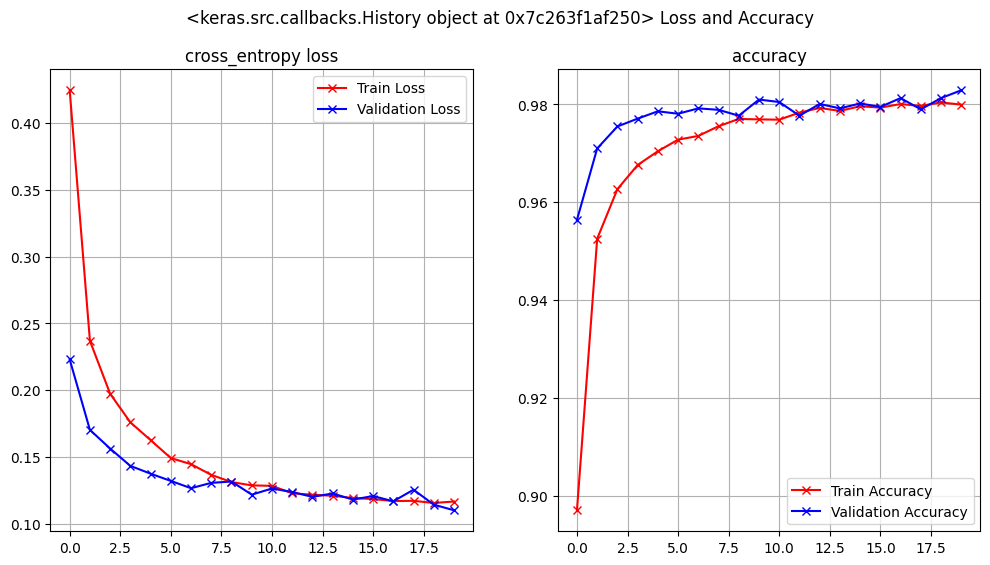

In [ ]:
plot_loss_accuracy(hist_10)

##### For l1, l1, and l2

In [ ]:
weights = [0.01, 0.001, 0.0001]

mods_model_l1_l1_l2 = []
hist_model_l1_l1_l2 = []
score_model_l1_l1_l2 = []


for i in weights:
  for j in weights:
    for k in weights:

      model_l1_l1_l2 = Sequential()

      #Building the first hidden layer with size 400
      model_l1_l1_l2.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(i)))

      #Regulating the first layer at 0.4
      model_l1_l1_l2.add(Dropout(0.4))

      #Building the second hidden layer with size 300
      model_l1_l1_l2.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(j)))

      #Regulating the first layer at 0.4
      model_l1_l1_l2.add(Dropout(0.4))

      #Building the output layer with size 10, taking the values of y
      model_l1_l1_l2.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(k)))

      model_l1_l1_l2.compile(
          loss = 'categorical_crossentropy',
          optimizer = RMSprop(lr = 0.001),
          metrics = ['accuracy']
      )

      mods_model_l1_l1_l2.append(model_l1_l1_l2)

      hist_l1_l1_l2 = model_l1_l1_l2.fit(
          x_train,
          y_train,
          batch_size = 128,
          epochs = 20,
          verbose = 1,
          validation_data = (x_test, y_test)
      )

      hist_model_l1_l1_l2.append(hist_l1_l1_l2)

      score_l1_l1_l2 = model_l1_l1_l2.evaluate(x_test, y_test, verbose=0)

      score_model_l1_l1_l2.append(score_l1_l1_l2)

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 11.3981 - accuracy: 0.1240 - val_loss: 4.4353 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 13s 28ms/step - loss: 4.4334 - accuracy: 0.1124 - val_loss: 4.4308 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 4.4345 - accuracy: 0.1124 - val_loss: 4.4380 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 4.4350 - accuracy: 0.1124 - val_loss: 4.4315 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 4.4353 - accuracy: 0.1124 - val_loss: 4.4386 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 4.4355 - accuracy: 0.1124 - val_loss: 4.4319 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 4.4356 - accuracy: 0.1124 - val_loss: 4.4388 - val_accuracy: 0.11

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 11.4245 - accuracy: 0.1265 - val_loss: 4.4410 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 4.4351 - accuracy: 0.1124 - val_loss: 4.4289 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 4.4359 - accuracy: 0.1124 - val_loss: 4.4423 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 4.4362 - accuracy: 0.1124 - val_loss: 4.4295 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 4.4364 - accuracy: 0.1124 - val_loss: 4.4428 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 4.4366 - accuracy: 0.1124 - val_loss: 4.4300 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 4.4366 - accuracy: 0.1124 - val_loss: 4.4428 - val_accuracy: 0.113

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 11.4082 - accuracy: 0.1294 - val_loss: 4.4428 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 4.4377 - accuracy: 0.1124 - val_loss: 4.4314 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 4.4382 - accuracy: 0.1119 - val_loss: 4.4450 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 4.4383 - accuracy: 0.1124 - val_loss: 4.4311 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 4.4382 - accuracy: 0.1124 - val_loss: 4.4452 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 4.4381 - accuracy: 0.1124 - val_loss: 4.4308 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 4.4381 - accuracy: 0.1124 - val_loss: 4.4452 - val_accuracy: 0.11

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 8.4287 - accuracy: 0.6281 - val_loss: 3.3150 - val_accuracy: 0.7786
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 3.4279 - accuracy: 0.6925 - val_loss: 3.2678 - val_accuracy: 0.7688
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 3.3365 - accuracy: 0.7117 - val_loss: 3.0970 - val_accuracy: 0.8257
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 3.2936 - accuracy: 0.7237 - val_loss: 3.1354 - val_accuracy: 0.8143
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 3.2629 - accuracy: 0.7309 - val_loss: 3.0277 - val_accuracy: 0.8420
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 3.2472 - accuracy: 0.7364 - val_loss: 3.0265 - val_accuracy: 0.8458
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 3.2331 - accuracy: 0.7385 - val_loss: 3.0465 - val_accuracy: 0.8412

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 8.2120 - accuracy: 0.6521 - val_loss: 3.0233 - val_accuracy: 0.8327
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 3.1609 - accuracy: 0.7315 - val_loss: 2.8710 - val_accuracy: 0.8563
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 3.0952 - accuracy: 0.7479 - val_loss: 2.8378 - val_accuracy: 0.8522
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 3.0657 - accuracy: 0.7537 - val_loss: 2.8892 - val_accuracy: 0.8197
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 3.0448 - accuracy: 0.7608 - val_loss: 2.8494 - val_accuracy: 0.8547
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 3.0274 - accuracy: 0.7663 - val_loss: 2.7986 - val_accuracy: 0.8508
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 3.0179 - accuracy: 0.7671 - val_loss: 2.8416 - val_accuracy: 0.8394

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 8.1566 - accuracy: 0.6536 - val_loss: 2.8893 - val_accuracy: 0.8401
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 3.0542 - accuracy: 0.7359 - val_loss: 2.7919 - val_accuracy: 0.8523
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 2.9653 - accuracy: 0.7541 - val_loss: 2.6820 - val_accuracy: 0.8707
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 2.9221 - accuracy: 0.7632 - val_loss: 2.6436 - val_accuracy: 0.8797
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 2.8941 - accuracy: 0.7738 - val_loss: 2.6691 - val_accuracy: 0.8758
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 2.8820 - accuracy: 0.7740 - val_loss: 2.6222 - val_accuracy: 0.8809
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 2.8657 - accuracy: 0.7808 - val_loss: 2.6558 - val_accuracy: 0.8726

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 7.8190 - accuracy: 0.6576 - val_loss: 3.2229 - val_accuracy: 0.7141
Epoch 2/20
469/469 [==============================] - 5s 12ms/step - loss: 3.0947 - accuracy: 0.7433 - val_loss: 2.7994 - val_accuracy: 0.8603
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 3.0016 - accuracy: 0.7637 - val_loss: 2.7250 - val_accuracy: 0.8759
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 2.9473 - accuracy: 0.7777 - val_loss: 2.7819 - val_accuracy: 0.8366
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 2.9224 - accuracy: 0.7855 - val_loss: 2.7365 - val_accuracy: 0.8587
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 2.9011 - accuracy: 0.7885 - val_loss: 2.5958 - val_accuracy: 0.8858
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 2.8874 - accuracy: 0.7906 - val_loss: 2.8355 - val_accuracy: 0.8186

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 7.6582 - accuracy: 0.6668 - val_loss: 2.8414 - val_accuracy: 0.8141
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 2.9216 - accuracy: 0.7573 - val_loss: 2.7775 - val_accuracy: 0.8015
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 2.8362 - accuracy: 0.7818 - val_loss: 2.6188 - val_accuracy: 0.8561
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 2.7944 - accuracy: 0.7905 - val_loss: 2.5054 - val_accuracy: 0.8867
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 2.7676 - accuracy: 0.7997 - val_loss: 2.4822 - val_accuracy: 0.8977
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 2.7476 - accuracy: 0.8042 - val_loss: 2.5135 - val_accuracy: 0.8836
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 2.7318 - accuracy: 0.8118 - val_loss: 2.6721 - val_accuracy: 0.8459

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 7.6208 - accuracy: 0.6783 - val_loss: 2.6628 - val_accuracy: 0.8531
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.8645 - accuracy: 0.7721 - val_loss: 2.7264 - val_accuracy: 0.8186
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 2.7546 - accuracy: 0.7934 - val_loss: 2.6445 - val_accuracy: 0.8294
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 2.7017 - accuracy: 0.8034 - val_loss: 2.4151 - val_accuracy: 0.8933
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 2.6682 - accuracy: 0.8113 - val_loss: 2.4559 - val_accuracy: 0.8984
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 2.6444 - accuracy: 0.8177 - val_loss: 2.4365 - val_accuracy: 0.8892
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 2.6268 - accuracy: 0.8208 - val_loss: 2.4276 - val_accuracy: 0.8786

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 6.3417 - accuracy: 0.6776 - val_loss: 2.2809 - val_accuracy: 0.8231
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 2.3889 - accuracy: 0.7441 - val_loss: 2.1162 - val_accuracy: 0.8617
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 2.3155 - accuracy: 0.7598 - val_loss: 2.0598 - val_accuracy: 0.8612
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 2.2868 - accuracy: 0.7652 - val_loss: 2.0451 - val_accuracy: 0.8688
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2678 - accuracy: 0.7704 - val_loss: 2.0259 - val_accuracy: 0.8722
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2600 - accuracy: 0.7698 - val_loss: 2.0107 - val_accuracy: 0.8752
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 2.2438 - accuracy: 0.7751 - val_loss: 1.9972 - val_accuracy: 0.8755

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 6.1570 - accuracy: 0.6974 - val_loss: 2.0519 - val_accuracy: 0.8469
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.1674 - accuracy: 0.7730 - val_loss: 1.9004 - val_accuracy: 0.8770
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 2.0826 - accuracy: 0.7916 - val_loss: 1.8470 - val_accuracy: 0.8881
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 2.0453 - accuracy: 0.8026 - val_loss: 1.8209 - val_accuracy: 0.8890
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 2.0218 - accuracy: 0.8085 - val_loss: 1.7934 - val_accuracy: 0.8978
Epoch 6/20
469/469 [==============================] - 5s 12ms/step - loss: 2.0111 - accuracy: 0.8106 - val_loss: 1.7893 - val_accuracy: 0.8954
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 1.9970 - accuracy: 0.8146 - val_loss: 1.7881 - val_accuracy: 0.9017

Epoch 1/20
469/469 [==============================] - 18s 21ms/step - loss: 6.1348 - accuracy: 0.6978 - val_loss: 2.0170 - val_accuracy: 0.8437
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 2.0769 - accuracy: 0.7753 - val_loss: 1.7867 - val_accuracy: 0.8801
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 1.9734 - accuracy: 0.7944 - val_loss: 1.7389 - val_accuracy: 0.8860
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 1.9172 - accuracy: 0.8079 - val_loss: 1.6866 - val_accuracy: 0.8933
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 1.8801 - accuracy: 0.8140 - val_loss: 1.6691 - val_accuracy: 0.8977
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 1.8582 - accuracy: 0.8184 - val_loss: 1.6666 - val_accuracy: 0.8915
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 1.8424 - accuracy: 0.8235 - val_loss: 1.6513 - val_accuracy: 0.898

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 3.2136 - accuracy: 0.8084 - val_loss: 1.4202 - val_accuracy: 0.8913
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 1.4633 - accuracy: 0.8455 - val_loss: 1.2642 - val_accuracy: 0.9011
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 1.3622 - accuracy: 0.8527 - val_loss: 1.1726 - val_accuracy: 0.9097
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 1.3079 - accuracy: 0.8586 - val_loss: 1.1248 - val_accuracy: 0.9132
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 1.2784 - accuracy: 0.8614 - val_loss: 1.0971 - val_accuracy: 0.9181
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 1.2571 - accuracy: 0.8637 - val_loss: 1.0930 - val_accuracy: 0.9210
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 1.2428 - accuracy: 0.8644 - val_loss: 1.0747 - val_accuracy: 0.9197

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 3.0344 - accuracy: 0.8197 - val_loss: 1.2004 - val_accuracy: 0.9019
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 1.2525 - accuracy: 0.8650 - val_loss: 1.0684 - val_accuracy: 0.9111
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 1.1661 - accuracy: 0.8762 - val_loss: 0.9999 - val_accuracy: 0.9209
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 1.1266 - accuracy: 0.8824 - val_loss: 0.9779 - val_accuracy: 0.9289
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 1.1039 - accuracy: 0.8849 - val_loss: 0.9571 - val_accuracy: 0.9259
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0822 - accuracy: 0.8877 - val_loss: 0.9346 - val_accuracy: 0.9330
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0677 - accuracy: 0.8889 - val_loss: 0.9246 - val_accuracy: 0.9339

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 2.9778 - accuracy: 0.8204 - val_loss: 1.1811 - val_accuracy: 0.8821
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 1.1675 - accuracy: 0.8641 - val_loss: 0.9416 - val_accuracy: 0.9211
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 1.0559 - accuracy: 0.8794 - val_loss: 0.9144 - val_accuracy: 0.9174
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0083 - accuracy: 0.8882 - val_loss: 0.8608 - val_accuracy: 0.9306
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.9834 - accuracy: 0.8901 - val_loss: 0.8179 - val_accuracy: 0.9433
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.9623 - accuracy: 0.8931 - val_loss: 0.8342 - val_accuracy: 0.9329
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.9552 - accuracy: 0.8946 - val_loss: 0.8276 - val_accuracy: 0.9342

Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 2.4859 - accuracy: 0.8383 - val_loss: 1.2069 - val_accuracy: 0.8978
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 1.1647 - accuracy: 0.8809 - val_loss: 0.9666 - val_accuracy: 0.9227
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0432 - accuracy: 0.8924 - val_loss: 0.9255 - val_accuracy: 0.9243
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.9897 - accuracy: 0.8984 - val_loss: 0.8502 - val_accuracy: 0.9398
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.9604 - accuracy: 0.9010 - val_loss: 0.8368 - val_accuracy: 0.9359
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.9370 - accuracy: 0.9038 - val_loss: 0.8124 - val_accuracy: 0.9418
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.9214 - accuracy: 0.9051 - val_loss: 0.8089 - val_accuracy: 0.9364

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 2.3475 - accuracy: 0.8471 - val_loss: 1.0705 - val_accuracy: 0.9086
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 1.0209 - accuracy: 0.8933 - val_loss: 0.8593 - val_accuracy: 0.9289
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.9028 - accuracy: 0.9041 - val_loss: 0.7916 - val_accuracy: 0.9325
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.8551 - accuracy: 0.9120 - val_loss: 0.7277 - val_accuracy: 0.9500
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.8328 - accuracy: 0.9125 - val_loss: 0.7348 - val_accuracy: 0.9421
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.8155 - accuracy: 0.9153 - val_loss: 0.7006 - val_accuracy: 0.9498
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.8036 - accuracy: 0.9176 - val_loss: 0.7002 - val_accuracy: 0.9491

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 2.3354 - accuracy: 0.8471 - val_loss: 1.0719 - val_accuracy: 0.9018
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.9852 - accuracy: 0.8938 - val_loss: 0.7764 - val_accuracy: 0.9376
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.8413 - accuracy: 0.9088 - val_loss: 0.6935 - val_accuracy: 0.9483
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.7920 - accuracy: 0.9152 - val_loss: 0.6889 - val_accuracy: 0.9417
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.7645 - accuracy: 0.9173 - val_loss: 0.6617 - val_accuracy: 0.9487
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.7495 - accuracy: 0.9175 - val_loss: 0.6242 - val_accuracy: 0.9544
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.7373 - accuracy: 0.9202 - val_loss: 0.6321 - val_accuracy: 0.9486

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 5.4517 - accuracy: 0.7609 - val_loss: 1.8054 - val_accuracy: 0.8793
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 1.8594 - accuracy: 0.8356 - val_loss: 1.6416 - val_accuracy: 0.8954
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 1.7680 - accuracy: 0.8486 - val_loss: 1.5849 - val_accuracy: 0.9016
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 1.7244 - accuracy: 0.8541 - val_loss: 1.5398 - val_accuracy: 0.9049
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 1.6966 - accuracy: 0.8561 - val_loss: 1.5193 - val_accuracy: 0.9054
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 1.6772 - accuracy: 0.8587 - val_loss: 1.5049 - val_accuracy: 0.9094
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 1.6665 - accuracy: 0.8590 - val_loss: 1.4989 - val_accuracy: 0.9078

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 5.2498 - accuracy: 0.7636 - val_loss: 1.6971 - val_accuracy: 0.8629
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 1.6916 - accuracy: 0.8413 - val_loss: 1.5147 - val_accuracy: 0.8959
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 1.5994 - accuracy: 0.8582 - val_loss: 1.4413 - val_accuracy: 0.9054
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.5541 - accuracy: 0.8705 - val_loss: 1.4240 - val_accuracy: 0.9087
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 1.5353 - accuracy: 0.8742 - val_loss: 1.3917 - val_accuracy: 0.9089
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 1.5100 - accuracy: 0.8784 - val_loss: 1.3452 - val_accuracy: 0.9232
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 1.4932 - accuracy: 0.8835 - val_loss: 1.3423 - val_accuracy: 0.9232

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 5.2533 - accuracy: 0.7660 - val_loss: 1.6191 - val_accuracy: 0.8858
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 1.6241 - accuracy: 0.8515 - val_loss: 1.4254 - val_accuracy: 0.8997
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 1.5133 - accuracy: 0.8672 - val_loss: 1.3690 - val_accuracy: 0.9097
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 1.4543 - accuracy: 0.8779 - val_loss: 1.2917 - val_accuracy: 0.9191
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 1.4202 - accuracy: 0.8845 - val_loss: 1.3035 - val_accuracy: 0.9135
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 1.3950 - accuracy: 0.8894 - val_loss: 1.2688 - val_accuracy: 0.9297
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 1.3798 - accuracy: 0.8925 - val_loss: 1.2493 - val_accuracy: 0.9307

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 2.1412 - accuracy: 0.8569 - val_loss: 0.9610 - val_accuracy: 0.9203
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.9607 - accuracy: 0.8983 - val_loss: 0.8034 - val_accuracy: 0.9277
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.8559 - accuracy: 0.9061 - val_loss: 0.7187 - val_accuracy: 0.9365
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.8103 - accuracy: 0.9110 - val_loss: 0.6991 - val_accuracy: 0.9420
Epoch 5/20
469/469 [==============================] - 6s 14ms/step - loss: 0.7850 - accuracy: 0.9140 - val_loss: 0.6752 - val_accuracy: 0.9412
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.7679 - accuracy: 0.9174 - val_loss: 0.6637 - val_accuracy: 0.9434
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.7548 - accuracy: 0.9166 - val_loss: 0.6422 - val_accuracy: 0.9450

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 2.0565 - accuracy: 0.8634 - val_loss: 0.8762 - val_accuracy: 0.9203
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.8394 - accuracy: 0.9085 - val_loss: 0.6736 - val_accuracy: 0.9422
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.7322 - accuracy: 0.9202 - val_loss: 0.6025 - val_accuracy: 0.9504
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6823 - accuracy: 0.9264 - val_loss: 0.5733 - val_accuracy: 0.9544
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6565 - accuracy: 0.9298 - val_loss: 0.5533 - val_accuracy: 0.9577
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6398 - accuracy: 0.9317 - val_loss: 0.5479 - val_accuracy: 0.9569
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6259 - accuracy: 0.9338 - val_loss: 0.5379 - val_accuracy: 0.9580

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.9787 - accuracy: 0.8666 - val_loss: 0.7877 - val_accuracy: 0.9275
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.7745 - accuracy: 0.9123 - val_loss: 0.6193 - val_accuracy: 0.9407
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6580 - accuracy: 0.9251 - val_loss: 0.5491 - val_accuracy: 0.9485
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6081 - accuracy: 0.9309 - val_loss: 0.5103 - val_accuracy: 0.9562
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5818 - accuracy: 0.9344 - val_loss: 0.5048 - val_accuracy: 0.9552
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5648 - accuracy: 0.9378 - val_loss: 0.4764 - val_accuracy: 0.9628
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5528 - accuracy: 0.9406 - val_loss: 0.4715 - val_accuracy: 0.9617

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 1.3600 - accuracy: 0.8866 - val_loss: 0.7800 - val_accuracy: 0.9448
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.7207 - accuracy: 0.9313 - val_loss: 0.5869 - val_accuracy: 0.9496
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.6054 - accuracy: 0.9376 - val_loss: 0.5157 - val_accuracy: 0.9551
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5543 - accuracy: 0.9420 - val_loss: 0.4644 - val_accuracy: 0.9636
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5206 - accuracy: 0.9441 - val_loss: 0.4495 - val_accuracy: 0.9624
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.5007 - accuracy: 0.9454 - val_loss: 0.4221 - val_accuracy: 0.9652
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.4845 - accuracy: 0.9475 - val_loss: 0.4114 - val_accuracy: 0.9657

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 1.2568 - accuracy: 0.8927 - val_loss: 0.7161 - val_accuracy: 0.9475
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.6449 - accuracy: 0.9395 - val_loss: 0.4971 - val_accuracy: 0.9623
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5188 - accuracy: 0.9461 - val_loss: 0.4247 - val_accuracy: 0.9656
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4669 - accuracy: 0.9507 - val_loss: 0.4028 - val_accuracy: 0.9640
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.4442 - accuracy: 0.9509 - val_loss: 0.3910 - val_accuracy: 0.9615
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4239 - accuracy: 0.9530 - val_loss: 0.3570 - val_accuracy: 0.9693
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.4127 - accuracy: 0.9537 - val_loss: 0.3682 - val_accuracy: 0.9662

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 1.2393 - accuracy: 0.8920 - val_loss: 0.6869 - val_accuracy: 0.9467
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6145 - accuracy: 0.9403 - val_loss: 0.5452 - val_accuracy: 0.9345
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4875 - accuracy: 0.9465 - val_loss: 0.4091 - val_accuracy: 0.9591
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4278 - accuracy: 0.9507 - val_loss: 0.3572 - val_accuracy: 0.9685
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3987 - accuracy: 0.9528 - val_loss: 0.3370 - val_accuracy: 0.9676
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3791 - accuracy: 0.9547 - val_loss: 0.3265 - val_accuracy: 0.9693
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3654 - accuracy: 0.9550 - val_loss: 0.3075 - val_accuracy: 0.9716

In [ ]:
for h in range(len(hist_model_l1_l1_l2)):
  print(f'{h + 1}')
  print('\tTest loss:', score_model_l1_l1_l2[h][0])
  print('\tTest accuracy:', score_model_l1_l1_l2[h][1])



1
	Test loss: 4.432188034057617
	Test accuracy: 0.11349999904632568
2
	Test loss: 4.430112361907959
	Test accuracy: 0.11349999904632568
3
	Test loss: 4.430825233459473
	Test accuracy: 0.11349999904632568
4
	Test loss: 2.9500322341918945
	Test accuracy: 0.8421000242233276
5
	Test loss: 2.707427978515625
	Test accuracy: 0.88919997215271
6
	Test loss: 2.5617146492004395
	Test accuracy: 0.8824999928474426
7
	Test loss: 2.6246514320373535
	Test accuracy: 0.881600022315979
8
	Test loss: 2.401743173599243
	Test accuracy: 0.9158999919891357
9
	Test loss: 2.322895050048828
	Test accuracy: 0.923799991607666
10
	Test loss: 1.9714709520339966
	Test accuracy: 0.8816999793052673
11
	Test loss: 1.7352705001831055
	Test accuracy: 0.9085999727249146
12
	Test loss: 1.5615233182907104
	Test accuracy: 0.9156000018119812
13
	Test loss: 1.0274701118469238
	Test accuracy: 0.9246000051498413
14
	Test loss: 0.8825995922088623
	Test accuracy: 0.9359999895095825
15
	Test loss: 0.7641704678535461
	Test accuracy: 

In [ ]:
for i in weights:
  for j in weights:
    for k in weights:
      print('l1: {}, l1: {}, l2: {}'.format(i, j, k))

l1: 0.01, l1: 0.01, l2: 0.01
l1: 0.01, l1: 0.01, l2: 0.001
l1: 0.01, l1: 0.01, l2: 0.0001
l1: 0.01, l1: 0.001, l2: 0.01
l1: 0.01, l1: 0.001, l2: 0.001
l1: 0.01, l1: 0.001, l2: 0.0001
l1: 0.01, l1: 0.0001, l2: 0.01
l1: 0.01, l1: 0.0001, l2: 0.001
l1: 0.01, l1: 0.0001, l2: 0.0001
l1: 0.001, l1: 0.01, l2: 0.01
l1: 0.001, l1: 0.01, l2: 0.001
l1: 0.001, l1: 0.01, l2: 0.0001
l1: 0.001, l1: 0.001, l2: 0.01
l1: 0.001, l1: 0.001, l2: 0.001
l1: 0.001, l1: 0.001, l2: 0.0001
l1: 0.001, l1: 0.0001, l2: 0.01
l1: 0.001, l1: 0.0001, l2: 0.001
l1: 0.001, l1: 0.0001, l2: 0.0001
l1: 0.0001, l1: 0.01, l2: 0.01
l1: 0.0001, l1: 0.01, l2: 0.001
l1: 0.0001, l1: 0.01, l2: 0.0001
l1: 0.0001, l1: 0.001, l2: 0.01
l1: 0.0001, l1: 0.001, l2: 0.001
l1: 0.0001, l1: 0.001, l2: 0.0001
l1: 0.0001, l1: 0.0001, l2: 0.01
l1: 0.0001, l1: 0.0001, l2: 0.001
l1: 0.0001, l1: 0.0001, l2: 0.0001


##### For l1, l2, and l2

In [ ]:
weights = [0.01, 0.005, 0.001, 0.0005, 0.0001]

mods_model_l1_l2_l2 = []
hist_model_l1_l2_l2 = []
score_model_l1_l2_l2 = []


for i in weights:
  for j in weights:
    for k in weights:

      model_l1_l2_l2 = Sequential()

      #Building the first hidden layer with size 400
      model_l1_l2_l2.add(Dense(400, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(i)))

      #Regulating the first layer at 0.4
      model_l1_l2_l2.add(Dropout(0.4))

      #Building the second hidden layer with size 300
      model_l1_l2_l2.add(Dense(300, activation = 'relu', input_shape = (784, ), kernel_regularizer = regularizers.l1(j)))

      #Regulating the first layer at 0.4
      model_l1_l2_l2.add(Dropout(0.4))

      #Building the output layer with size 10, taking the values of y
      model_l1_l2_l2.add(Dense(10, activation = 'softmax',  kernel_regularizer = regularizers.l2(k)))

      model_l1_l2_l2.compile(
          loss = 'categorical_crossentropy',
          optimizer = RMSprop(lr = 0.001),
          metrics = ['accuracy']
      )

      mods_model_l1_l2_l2.append(model_l1_l2_l2)

      hist_l1_l2_l2 = model_l1_l2_l2.fit(
          x_train,
          y_train,
          batch_size = 128,
          epochs = 20,
          verbose = 1,
          validation_data = (x_test, y_test)
      )

      hist_model_l1_l2_l2.append(hist_l1_l2_l2)

      score_l1_l2_l2 = model_l1_l2_l2.evaluate(x_test, y_test, verbose=0)
      score_model_l1_l2_l2.append(score_l1_l2_l2)

Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 11.4516 - accuracy: 0.1247 - val_loss: 4.4416 - val_accuracy: 0.1135
Epoch 2/20
469/469 [==============================] - 6s 14ms/step - loss: 4.4363 - accuracy: 0.1124 - val_loss: 4.4301 - val_accuracy: 0.1135
Epoch 3/20
469/469 [==============================] - 9s 18ms/step - loss: 4.4374 - accuracy: 0.1124 - val_loss: 4.4444 - val_accuracy: 0.1135
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 4.4379 - accuracy: 0.1124 - val_loss: 4.4310 - val_accuracy: 0.1135
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 4.4382 - accuracy: 0.1124 - val_loss: 4.4449 - val_accuracy: 0.1135
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 4.4383 - accuracy: 0.1124 - val_loss: 4.4313 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 4.4384 - accuracy: 0.1124 - val_loss: 4.4451 - val_accuracy: 0.113

#### Conclusion

#type your answer here

In [ ]:
for i in range(len(full_hist)):
  print(i + 1)
  print('\tTest loss:', full_score[i][0])
  print('\tTest accuracy:', full_score[i][1])

1
	Test loss: 0.08793707937002182
	Test accuracy: 0.9861999750137329
2
	Test loss: 0.07352037727832794
	Test accuracy: 0.9843000173568726
3
	Test loss: 4.447136878967285
	Test accuracy: 0.11349999904632568
4
	Test loss: 0.9431504011154175
	Test accuracy: 0.9394000172615051
5
	Test loss: 0.2900368273258209
	Test accuracy: 0.9753000140190125
6
	Test loss: 2.5560762882232666
	Test accuracy: 0.8446999788284302
7
	Test loss: 0.7931398153305054
	Test accuracy: 0.9077000021934509
8
	Test loss: 0.2655916213989258
	Test accuracy: 0.9643999934196472
9
	Test loss: 0.1854342222213745
	Test accuracy: 0.9785000085830688
10
	Test loss: 0.11013782024383545
	Test accuracy: 0.9829000234603882
11
	Test loss: 1.4870877265930176
	Test accuracy: 0.8772000074386597
12


IndexError: list index out of range